<h1>Apple IPhone Customer Reviews Sentiment Analysis<h1/>

dataset : https://www.kaggle.com/datasets/mrmars1010/iphone-customer-reviews-nlp/code

In [3]:
import pandas as pd 
import numpy as np

import datetime as dt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from imblearn.over_sampling import SMOTE

import matplotlib.pylab as plt
import seaborn as sns
from wordcloud import WordCloud

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC

import warnings 
warnings.filterwarnings('ignore')

<h2>load & clean data<h2/>

In [ ]:
df = pd.read_csv('')

In [3]:
df.head(10)

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
5,B09G9BL5CP,India,14-05-2024,True,5,Too smooth and effective battery life,5 star 👍,https://www.amazon.in/gp/customer-reviews/R3J3...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
6,B09G9BL5CP,India,28-01-2024,True,5,Apple 13 256 GB,"Great Product... Nothing to say, as the Name A...",https://www.amazon.in/gp/customer-reviews/R2ZM...,Reviewed in India on 28 January 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
7,B09G9BL5CP,India,01-03-2024,True,5,Good,Good product 😀💯,https://www.amazon.in/gp/customer-reviews/R1XF...,Reviewed in India on 1 March 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
8,B09G9BL5CP,India,14-11-2023,True,4,Good,Nice product,https://www.amazon.in/gp/customer-reviews/R2QA...,Reviewed in India on 14 November 2023,Colour: MidnightSize: 256 GB,B09G9BQS98
9,B09G9BL5CP,India,03-02-2024,True,5,Excellent,Excellent product,https://www.amazon.in/gp/customer-reviews/R322...,Reviewed in India on 3 February 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [4]:
df.shape

(3062, 11)

In [5]:
df.isnull().sum()

productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64

will drop the raws with null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [7]:
df = df.dropna()

varify that drop was successfull

In [8]:
df.isnull().sum()

productAsin          0
country              0
date                 0
isVerified           0
ratingScore          0
reviewTitle          0
reviewDescription    0
reviewUrl            0
reviewedIn           0
variant              0
variantAsin          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

<h1>EDA<h1/>

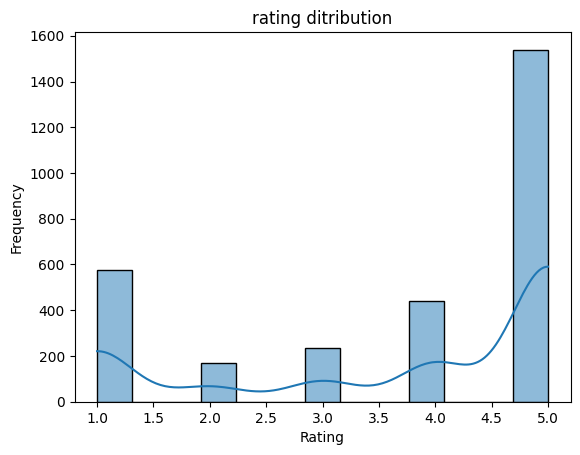

In [29]:
sns.histplot(df['ratingScore'], kde=True)
plt.title('rating ditribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Rating score over time')

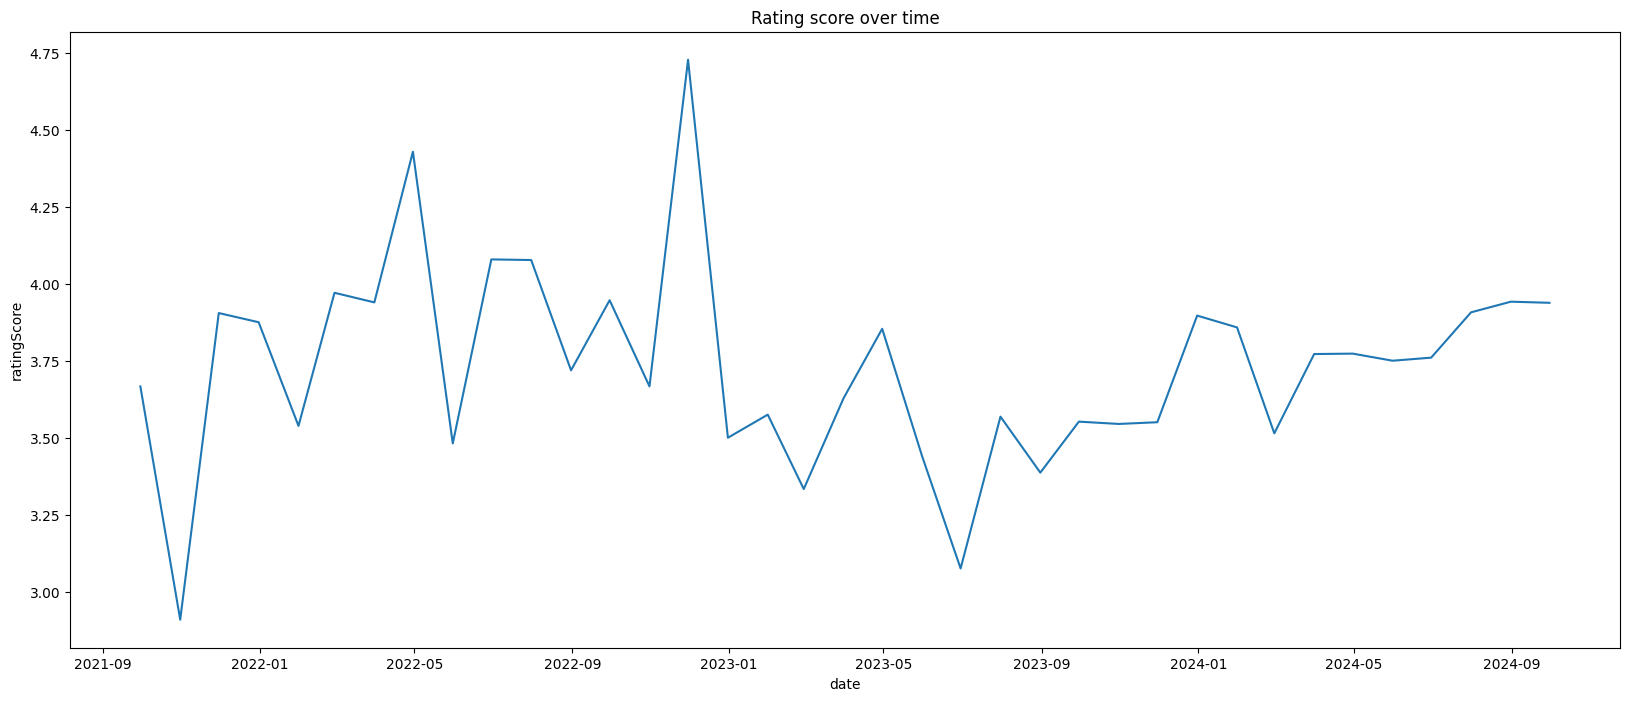

In [26]:
df['date'] = pd.to_datetime(df['date'], format = "%d-%m-%Y")

Rating_Date = df[['date', 'ratingScore']].set_index('date').resample('M').mean().reset_index()

plt.figure(figsize=(20,8))
sns.lineplot(data = Rating_Date, x = 'date', y = 'ratingScore')
plt.title('Rating score over time')

<h2>text preprocessing<h2/>

In [12]:
#run once
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('vader_lexicon')
#nltk.download("vader_lexicon")

function to clean the review text

In [13]:
stop_words = set(stopwords.words('english')) #list of stop words
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() #convert to lower case
    text = re.sub(r'[^a-z\s]', '', text) #remove 
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return ' '.join(words)

apply the function on the review desription column

In [14]:
df['cleaned'] = df['reviewDescription'].apply(clean_text)

In [15]:
df[['reviewDescription', 'cleaned']].head(5)

,reviewDescription,cleaned
0,"Every thing is good about iPhones, there's not...",every thing good iphones there nothing compare...
1,"It look so fabulous, I am android user switche...",look fabulous android user switched apple perf...
2,I tried to flip camera while recording but no ...,tried flip camera recording facility added pau...
3,100% genuine,genuine
4,Happy to get the iPhone 13 in Amazon offer,happy get iphone amazon offer


<h2>sentiment analysis<h2>

In [16]:
#creating sentiment labels
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return "positive"
    elif score < -0.05:
        return "negative"
    else:
        return "neutral"

df["TextTosentiment"] = df["cleaned"].apply(get_sentiment)
print(df["TextTosentiment"].value_counts())

TextTosentiment
positive    2131
negative     418
neutral      411
Name: count, dtype: int64


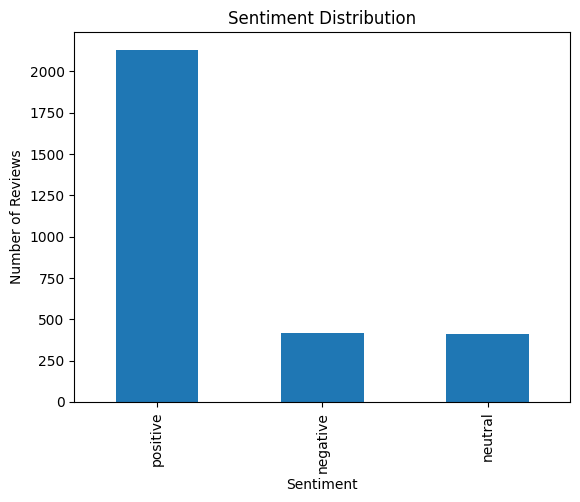

In [17]:
df["TextTosentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

word cloud of all the data (positive and nigative)

[('phone', 1721), ('iphone', 1194), ('good', 924), ('battery', 760), ('camera', 615), ('product', 548), ('apple', 523), ('like', 412), ('amazon', 384), ('new', 373), ('quality', 367), ('great', 347), ('android', 345), ('one', 345), ('issue', 299), ('time', 295), ('day', 286), ('buy', 281), ('get', 269), ('also', 264)]


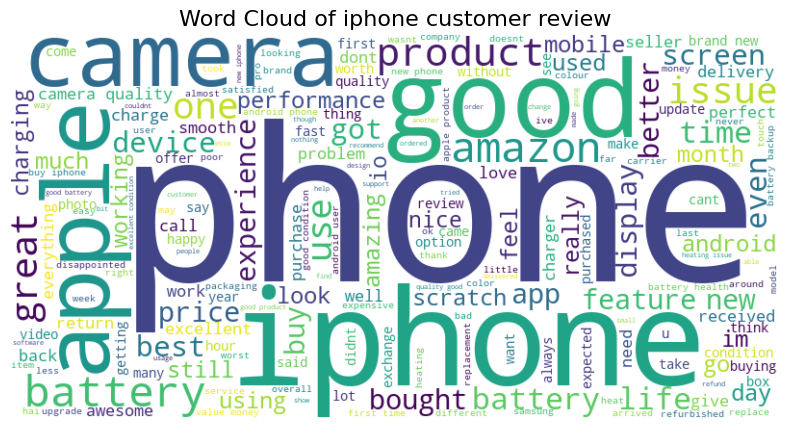

In [18]:
all_words = " ".join(df["cleaned"]).split()
word_counts = Counter(all_words)
print(word_counts.most_common(20))


wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of iphone customer review", fontsize=16)
plt.show()

<h2>Splitting the data for training and testing<h2/>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned"], df["TextTosentiment"], test_size=0.2, random_state=42)

<h2>text vectorization<h2/>

In [20]:
vectorize = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words="english")
X_train_vec = vectorize.fit_transform(X_train)
X_test_vec = vectorize.transform(X_test)


In [ ]:
# Balance training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_vec, y_train)

<h2>Train and evaluate<h2/>

we will iterate through the models for training and evaluation

In [22]:
models = {
    'Random Forest': RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "AdaBoostClassifier": AdaBoostClassifier(), 
    "linearSVC":LinearSVC()
}

In [23]:
results = []

for name, model in models.items():
    #train
    model.fit(X_train_bal, y_train_bal)
    #predict
    y_pred = model.predict(X_test_vec)
    #calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    #store the result
    results.append({
        'Model' : name,
        'Accuracy':accuracy,
        'Precision': class_report['weighted avg']['precision'],
        'Recall': class_report['weighted avg']['recall'],
        'F1-Score': class_report['weighted avg']['f1-score']
        
    })
    
    print(f"{name} Training is completed\n")
    
results_df = pd.DataFrame(results)

Random Forest Training is completed

LogisticRegression Training is completed

AdaBoostClassifier Training is completed

linearSVC Training is completed



In [24]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.871622,0.879717,0.871622,0.872589
1,LogisticRegression,0.858108,0.873880,0.858108,0.863396
2,AdaBoostClassifier,0.582770,0.780925,0.582770,0.623687
3,linearSVC,0.878378,0.884859,0.878378,0.880415


lineaSVC algorithm has the best performance